In [1]:
#import all the libraries use in this analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
#the data is a csv file
df_raw = pd.read_csv('avocado.csv')
df_raw.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df_raw.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## Data Cleaning
There are a few steps of data cleaning need to be done in this dataset as listed below:

Remove unname column

change date datatype to datetime

total volume,4046,4225 and 4770 shouldn't be in decimal because represent the number of avocados. Should be discrete type of data

Remove unwanted column
There are some other columns that exist in this dataset which are not described by the Hass Avocado Board and they are Unnamed,Total Bags,Small Bags,Large Bags and XLarge Bags. Since these columns are not my main concern in this dataset, I decided to remove

In [5]:
#make a dataset copy. So any changes is done to the copied dataframe
df=df_raw.copy()

In [6]:
#dropping the unwanted columns
_=['Unnamed: 0','Total Bags','Small Bags','Large Bags','XLarge Bags']

for cname in _:
    df.drop(columns=cname,inplace=True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


## Change datatype Date to datetime and total volume,4046,4225 and 4770 to integer
Firstly, I changed the Date from int64 to datetime datatype as below:

In [8]:
df.Date=pd.to_datetime(df.Date)

## Next the following columns in _ variable are changed into int since they are the unit of avocado. If doesn't make sense if this value is in decimal.

In [9]:
cols=['Total Volume','4046','4225','4770']

for cname in cols:
    df[cname]=df[cname].abs().astype('int')

### So the final cleaned dataframe look like this:

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236,1036,54454,48,conventional,2015,Albany
1,2015-12-20,1.35,54876,674,44638,58,conventional,2015,Albany
2,2015-12-13,0.93,118220,794,109149,130,conventional,2015,Albany
3,2015-12-06,1.08,78992,1132,71976,72,conventional,2015,Albany
4,2015-11-29,1.28,51039,941,43838,75,conventional,2015,Albany


### EDA
Main objective in this part os to determine if there are any sort of patterns in our data.

What I intend to explore here are as below:

Explore the distibution and correlation of variables

find any interesting trends?

Does volume has any impact on the avocado price?

Distribution and Correlations of variables AveragePrice,Total Volumn, all three different PLU types` using Seaborn pairplots

In [11]:
#sns.set_style('darkgrid')
%matplotlib inline

### Using Pearson correlation which measure the linear correlation between two variables X and Y.

find the features that has high correlation value with AveragePrice (closer to +1 or -1)

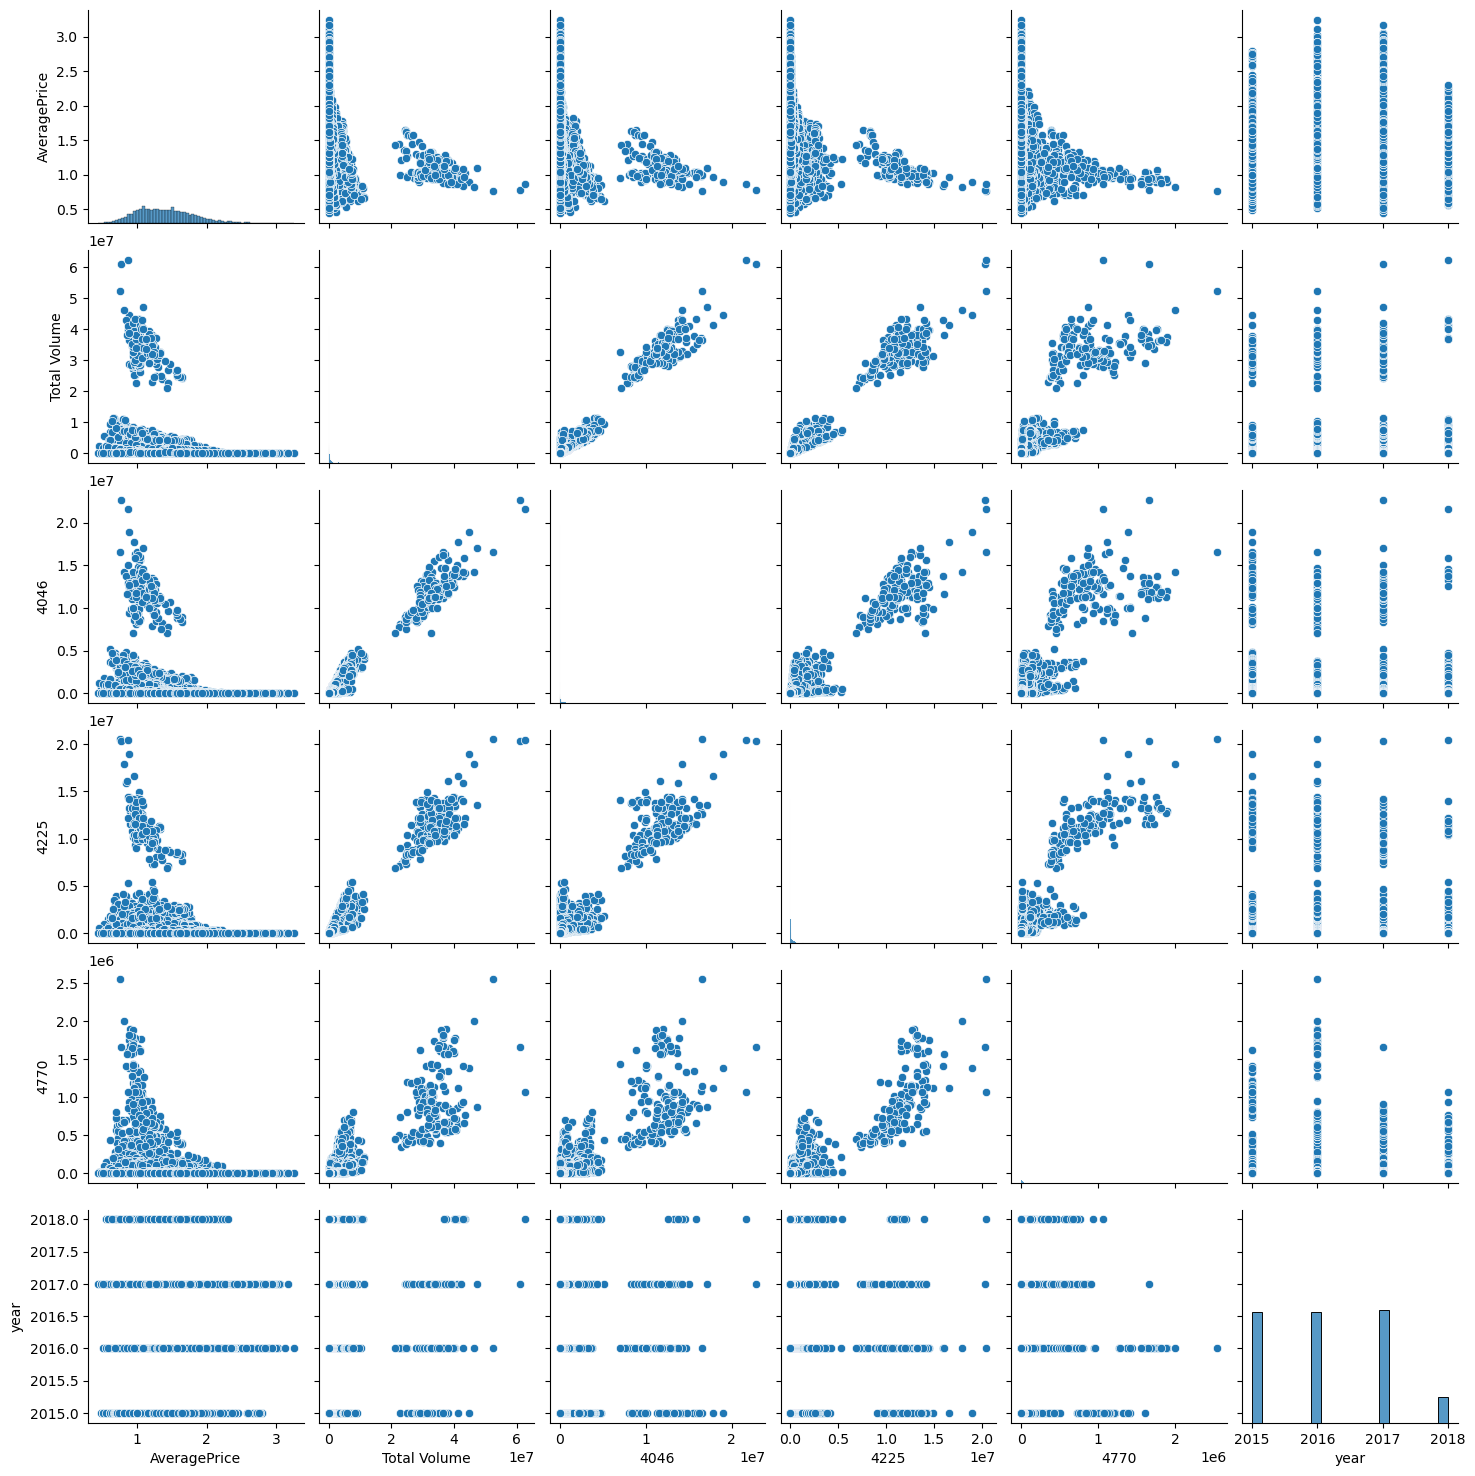

In [12]:
sns.pairplot(df)

### Most of the scatter plot seems to have 2 clusters. Is this represented by the type of avocado(organic and conventional)? lets plot again with type being the hue.

why 2018

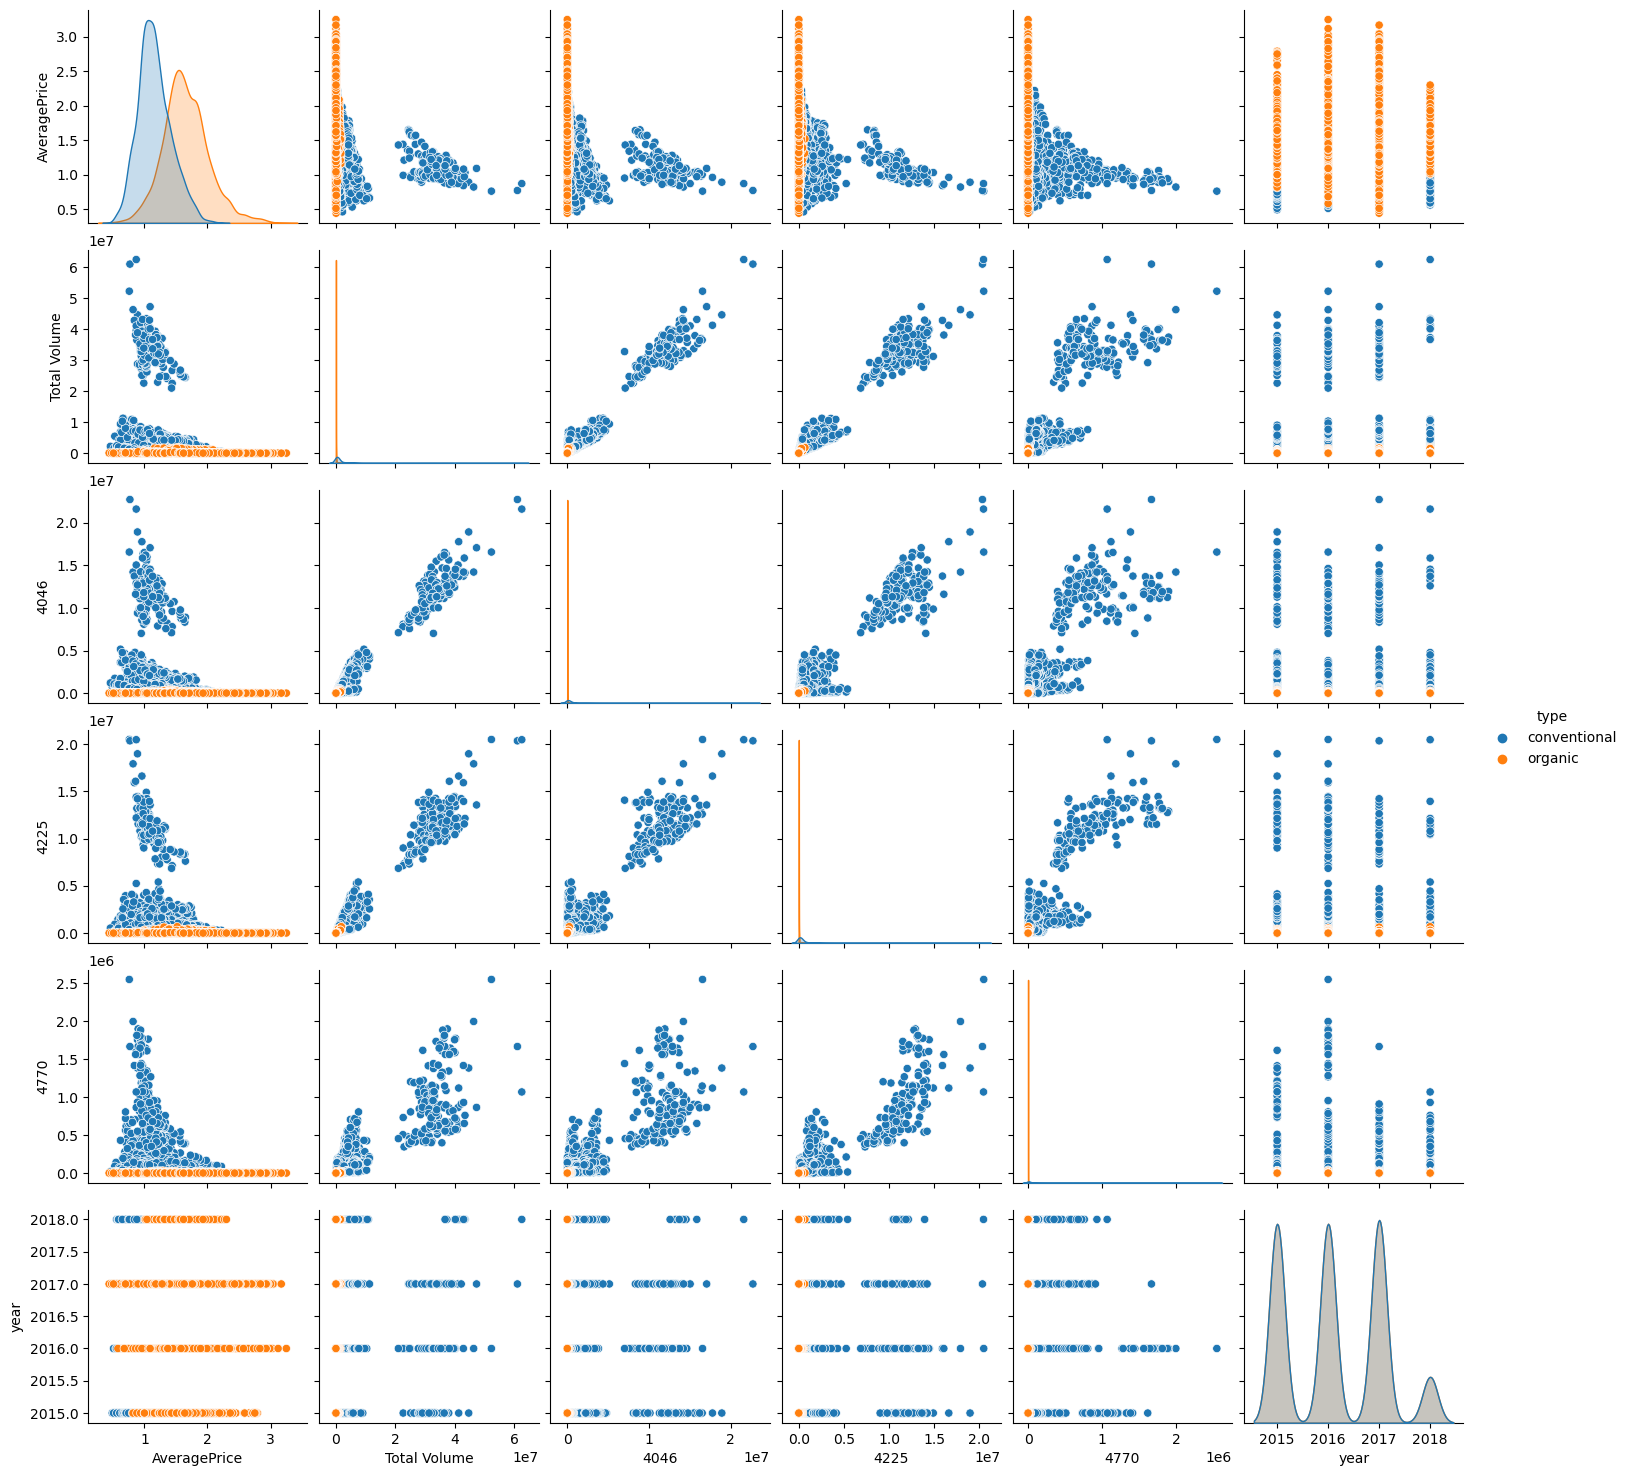

In [13]:
sns.pairplot(df, hue='type');

### type is not the cause of the clusters in the scatter plot. Maybe its a standard of volumn of avocado number sold in the market?

Further analysis will be:

Since price is our dependent variable, we will try to uncover the price distribution closer

How price changes for different type of avocado?

To see the avocado's demand from year to year

Is there any particular season that people love to eat avocado?

Data Analysis and Visualisation
Average Price distribution

C:\Users\Sumit Garg\AppData\Local\Temp\ipykernel_10444\2101135120.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(x,bins=40,kde=False)
C:\Users\Sumit Garg\AppData\Local\Temp\ipykernel_10444\2101135120.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2= sns.distplot(x2_a,label='conventional',kd

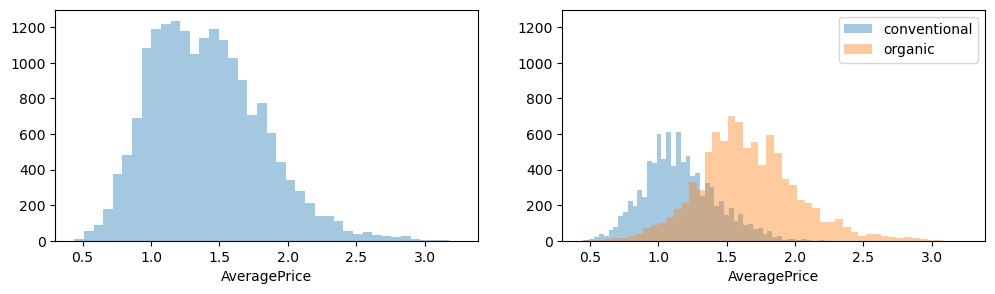

In [14]:
x2_a=df[df['type']=='conventional'].AveragePrice
x2_b=df[df['type']=='organic'].AveragePrice

plt.figure(figsize=[12,3])

plt.subplot(1,2,1)
x=df.AveragePrice
ax1= sns.distplot(x,bins=40,kde=False)

plt.subplot(1,2,2,sharey=ax1)
ax2= sns.distplot(x2_a,label='conventional',kde=False)
ax3= sns.distplot(x2_b,label='organic',kde=False)
plt.legend()
plt.show()

### bi-model with right skewed

organic avocado shifted to the right in the plot, shows higher price and more right skewed than conventional avocado

Price changes for different type of avocado

In [16]:
import statsmodels.api as sm

In [17]:
df[['conventional','organic']]=pd.get_dummies(df.type)
#df=df.drop('type',axis=1)
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,conventional,organic
0,2015-12-27,1.33,64236,1036,54454,48,conventional,2015,Albany,1,0
1,2015-12-20,1.35,54876,674,44638,58,conventional,2015,Albany,1,0
2,2015-12-13,0.93,118220,794,109149,130,conventional,2015,Albany,1,0
3,2015-12-06,1.08,78992,1132,71976,72,conventional,2015,Albany,1,0
4,2015-11-29,1.28,51039,941,43838,75,conventional,2015,Albany,1,0


### How is the avocado demand from year to year?

In [18]:
#change to datetimeindex
df.set_index(df.Date,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [19]:
df['quarter']= [ts.quarter for ts in df.index]

df.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,conventional,organic,quarter
Date,,,,,,,,,,,
2015-12-27,1.33,64236,1036,54454,48,conventional,2015,Albany,1,0,4
2015-12-20,1.35,54876,674,44638,58,conventional,2015,Albany,1,0,4
2015-12-13,0.93,118220,794,109149,130,conventional,2015,Albany,1,0,4
2015-12-06,1.08,78992,1132,71976,72,conventional,2015,Albany,1,0,4
2015-11-29,1.28,51039,941,43838,75,conventional,2015,Albany,1,0,4


In [20]:
df_Q1= df.query('quarter==1')
df_Q1=df_Q1.groupby(['year','type'])['Total Volume'].sum()
df_Q1

year  type        
2015  conventional    1075859426
      organic           23445766
2016  conventional    1265974189
      organic           29289085
2017  conventional    1321464239
      organic           42238680
2018  conventional    1334205761
      organic           48531944
Name: Total Volume, dtype: int32

In [21]:
df_Q1=df_Q1.reset_index()
df_Q1

,year,type,Total Volume
0,2015,conventional,1075859426
1,2015,organic,23445766
2,2016,conventional,1265974189
3,2016,organic,29289085
4,2017,conventional,1321464239
5,2017,organic,42238680
6,2018,conventional,1334205761
7,2018,organic,48531944


In [22]:
#calculate the percentage increase in 2018 compare to 2015
diff=df_Q1.groupby('year')['Total Volume'].sum().iloc[3]-df_Q1.groupby('year')['Total Volume'].sum().iloc[0]
perc_inc=diff/df_Q1.groupby('year')['Total Volume'].sum().iloc[0]
perc_inc

0.2578287768152377

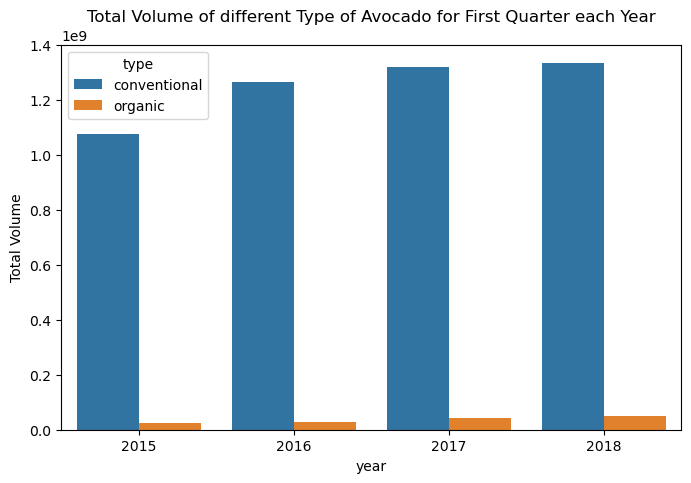

In [23]:
plt.figure(figsize=[8,5])
sns.barplot(data=df_Q1,x='year',y='Total Volume',hue='type')
plt.title('Total Volume of different Type of Avocado for First Quarter each Year')
plt.show()

### can't really see the increment. Next, try to normalize the frequency to sum to 1.

In [24]:
def norm_total(group):
    group['normed_total'] = group['Total Volume'] / group['Total Volume'].sum()
    return group

df_Q1norm = df_Q1.groupby('year').apply(norm_total)

C:\Users\Sumit Garg\AppData\Local\Temp\ipykernel_10444\1682866294.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_Q1norm = df_Q1.groupby('year').apply(norm_total)


In [25]:
df_Q1norm

,year,type,Total Volume,normed_total
0,2015,conventional,1075859426,0.978672
1,2015,organic,23445766,0.021328
2,2016,conventional,1265974189,0.977388
3,2016,organic,29289085,0.022612
4,2017,conventional,1321464239,0.969026
5,2017,organic,42238680,0.030974
6,2018,conventional,1334205761,0.964902
7,2018,organic,48531944,0.035098


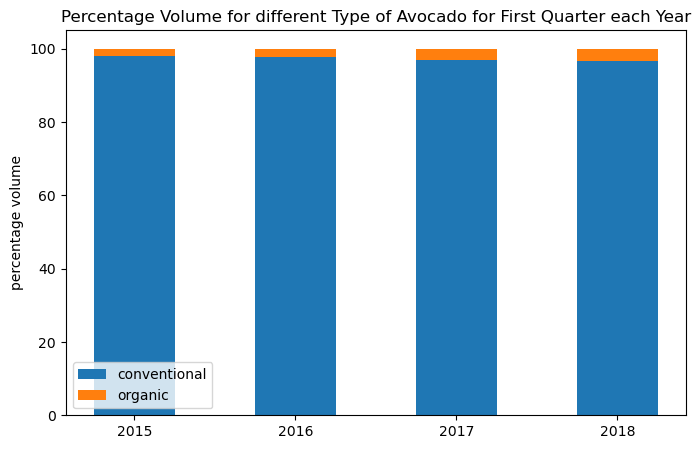

In [26]:
#sns.barplot(data=df_Q1norm,x='year',y='normed_total',hue='type')
plt.figure(figsize=[8,5])

N = 4
conv = df_Q1norm.query('type == "conventional"').normed_total*100
organic = df_Q1norm.query('type == "organic"').normed_total*100
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars

p1 = plt.bar(ind, conv, width)
p2 = plt.bar(ind, organic, width, bottom=conv)

plt.ylabel('percentage volume')
plt.title('Percentage Volume for different Type of Avocado for First Quarter each Year')
plt.xticks(ind, ('2015', '2016', '2017', '2018'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend(('conventional', 'organic'))

plt.show()

### Price changes with time series

In [27]:
#resample the data in monthly period and aggregation like mean and standard deviation are done on the data

df_con_mean=df.query('type == "conventional"').resample('M').AveragePrice.mean()
df_org_mean=df.query('type == "organic"').resample('M').AveragePrice.mean()

df_con_std=df.query('type == "conventional"').resample('M').AveragePrice.std()
df_org_std=df.query('type == "organic"').resample('M').AveragePrice.std()

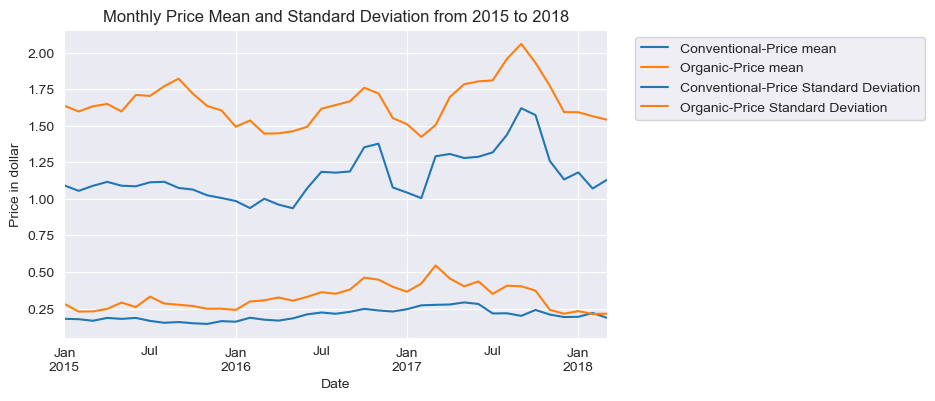

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=[7,4])
color1 = 'tab:blue'
color2 = 'tab:orange'

ax1=df_con_mean.plot(color=color1)
ax2=df_org_mean.plot(color=color2)
ax3=df_con_std.plot(color=color1)
ax4=df_org_std.plot(color=color2)

plt.legend(['Conventional-Price mean','Organic-Price mean',
            'Conventional-Price Standard Deviation','Organic-Price Standard Deviation'],
           loc='upper right', bbox_to_anchor=(1.6, 1))
plt.ylabel('Price in dollar')
plt.title('Monthly Price Mean and Standard Deviation from 2015 to 2018')


plt.show()

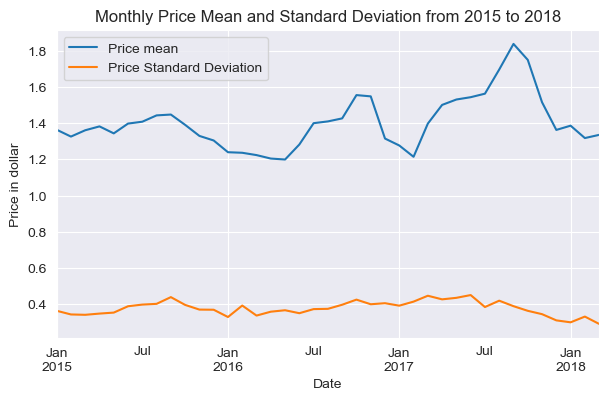

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=[7,4])
month_price_mean=df.resample('M').AveragePrice.mean()
month_price_mean.plot()

month_price_std=df.resample('M').AveragePrice.std()
month_price_std.plot()

plt.legend(['Price mean','Price Standard Deviation'])
plt.ylabel('Price in dollar')
plt.title('Monthly Price Mean and Standard Deviation from 2015 to 2018')
plt.show()

#### the increase of the avocado price cause the higher fluctuation of avocado price.

proven by looking at the graph where the spikes in price (in this case take for example those higher than 1.40 dollar) correlate with higher standard deviation(spikes on orange line for value more than 0.4).

What interesting is that the trend is most likely repetitive in the 3rd quarter yearly. why? is it correlate with the season like summer? because the price drop at year end and beginning of the next year

## Do people eat more avocado during summer?

In [30]:
df.resample('W')['Total Volume'].sum()

Date
2015-01-04     84674288
2015-01-11     78555753
2015-01-18     78388735
2015-01-25     76466226
2015-02-01    119453181
                ...    
2018-02-25    109231389
2018-03-04    111844876
2018-03-11    111465145
2018-03-18    113673928
2018-03-25    118268903
Freq: W-SUN, Name: Total Volume, Length: 169, dtype: int32

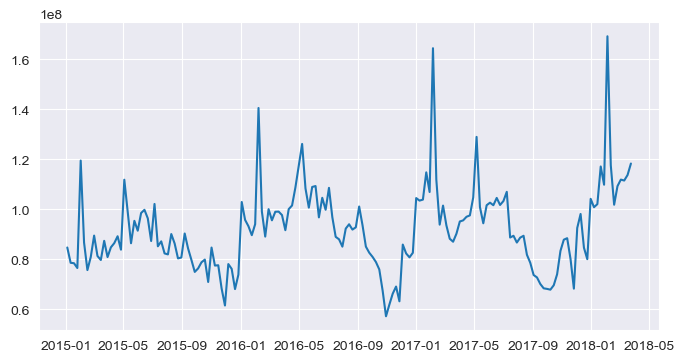

In [31]:
month_vol_sum=df.resample('W')['Total Volume'].sum()

fig, ax = plt.subplots(figsize=[8,4])
ax.plot(month_vol_sum)

plt.show()


### I expected that people eat more avocados in summer(June to August) but this data doesn't show any significant increase or drop during that period. What I find interesting are the spikes, which happen annualy at end of January and continued with second spike in early May.

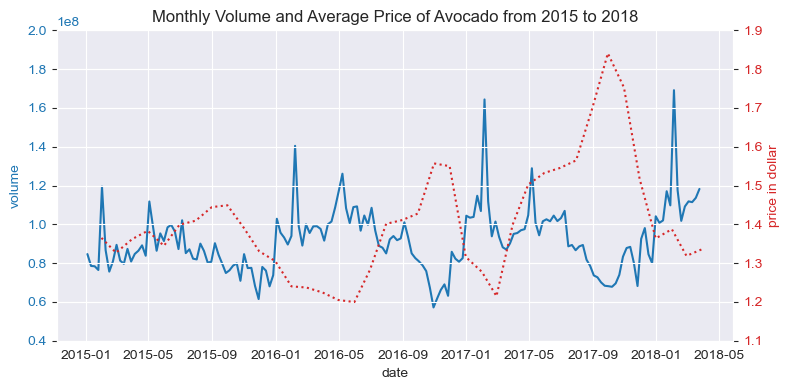

In [32]:
fig, ax1 = plt.subplots(figsize=[8,4])

color = 'tab:blue'
ax1.plot( month_vol_sum, color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('volume', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axis(ymin=40000000,ymax=200000000)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.plot(month_price_mean, color=color, linestyle=':')
ax2.set_ylabel('price in dollar', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Monthly Volume and Average Price of Avocado from 2015 to 2018')
ax2.axis(ymin=1.1,ymax=1.9)

fig.tight_layout()
plt.show()

### Price and volumn are not correlated with each other as we know from earlier during exploration part. However,I find it interesting that we can see for the past two years that when the demand is in the low for the yearly cycle, the price is high for that particular period which we can see between Sept-Dec 2016 and 2017.

Conclusion We know that organic product usually cost higher than conventional and this dataset has proved that. From our linear regression fit, a conventional avocado is predicted to cost 1.15 dollar and an organic avocado is predicted to cost 50 cent higher than that.

We also got to know how people love avocado in 2018 compare to three years back as the demand is getting higher. Overall the percentage of Hass avocado sold has increased for about 26% in first quarter 2018 compare to first quarter of 2015 and most of the sale is covered by conventional avocado yet organic avocado is getting more popularity from year to year.

The surge of avocado price in 2018 was caused by the short supply. To avoid this, can the growers tally the higher demand in future? This might also be hard since the crop production also depends on the weather, which is something out of human's control.

So, if you are an avocado lover, now you know when is the best time to buy avocado before it get pricey!

Further exploration ideas:

Explore the region: Which region has high demand of avocados?

Have they always been the top avocado consumer?